# Natural Language Processing Theory

Read the wikipedia page for more information.

NLP serves a lot of purposes when you are working with unstructured text data. Imagine you work for Google News and you want to group news articles by topic. Or you work for a legal firm and you need to sift through thousands of pages of legal documents to find relevant ones. This is where NLP can help. 

We will want to:
- Compile documents
- Featurize them
- Compare their features

Simple Example:

- You have two documents:
    - Blue House
    - Red House
- Featurize based on word count:
    - Blue House --> (red, blue, house) --> (0,1,1)
    - Red House --> (red, blue, house) --> (1,0,1)

A document represented as a vector of word counts is called a "Bag of Words"
- Blue House --> (red, blue, house) --> (0,1,1)
- Red House --> (red, blue, house) --> (1,0,1)

You can use cosine similarity on the vectors made to determine similarity.

In [2]:
from IPython.display import Image

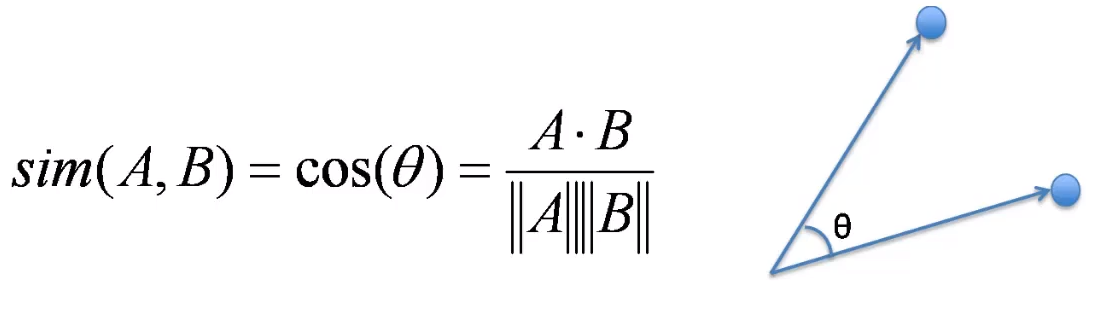

In [3]:
Image(filename='cosine_similarity.PNG')

We can improve on Bag of Words by adjusting word counts based on their frequency in corpus (the group of all the documents). We can use Term Frequency - Inverse Document Frequency (TF-IDF). 

- Term Frequency - importance of the term within that document
    - TF(d,t) = Number of occurrences of term t in document d

- Inverse Document Frequency - Importance of the term in the corpus
    - IDF(t) = log(D/t) where
        - D = total number of documents
        - t = number of documents with the term

Mathematically, TF-IDF is then expressed as:

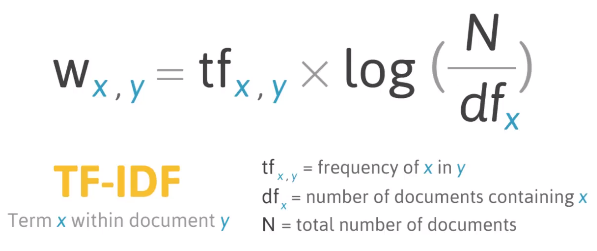

In [4]:
Image(filename='TF_IDF Equation.PNG')

Here, we are saying term 'x' within document 'y'. We do this not only to get a word count, but to also get a notiation of how important a word is not only to a specific document, but to all the documents in consideration. 

We are going to build a spam filter with Pytho.

In [5]:
import nltk

In [6]:
#nltk.download_shell()

In [7]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
print(len(messages))

5574


In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

This is a tab separation. 

In [11]:
import pandas as pd

In [12]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Notice that this tells us that we have repeated messages since unique is less than count. 

We are going to start with a higher level view of the data in order to try and get a better understanding on what separates normal messages from spam. 

In [15]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

A large part of NLP is feature engineering. The better your domain knowledge on the data, the better chance you have of engineering more/better features from it. 

Let's make a new column to see how long the text messages are. 

In [16]:
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let's visualize the length of the messages. 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

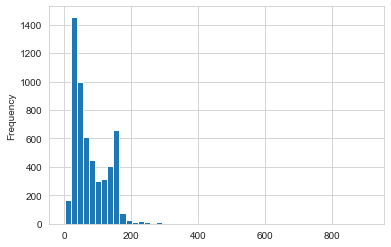

In [19]:
messages['length'].plot.hist(bins=50)

We notice that there is some bi-modal behavior. It is possible the message length is a good features to consider. 

Notice how large our x-axis is. That means there is at least one message that is quite long. 

In [20]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The max is 910 characters long. Lets find it. 

In [21]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8F58FEA08>,
      dtype=object)

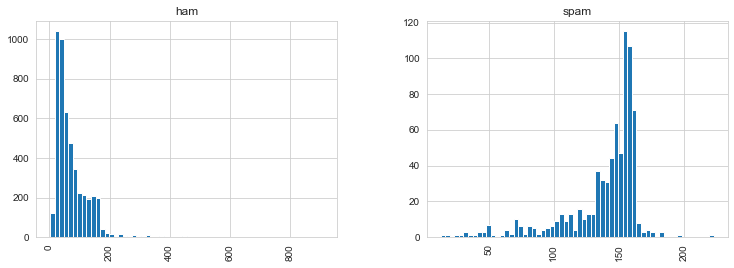

In [22]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

So just through some data exploration, we have discovered that spam messages gernally have many more characters. 

Now we want to actually do some machine learning. However, a problem we are going to run into is that all the data is in strings, and the algorithms can't work with that. They need to be numerical in some nature. There are a number of ways to convert a corpus of strings to a vector format, but the simplest way is through what is known as a "Bag of Words", where each word in the text will be represented by one number. 

First we are going to write a function that splits a message into its individual words and return a list. We are also going to remove very common words (a, if, the), which are known as stop words. We are also going to take advantage of Python's built in string library. 

In [23]:
import string

First thing we want to do is eliminate punctuation. 

In [24]:
mess = 'Sample message! Notice: It has puncutation.'

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We are going to use list comprehension and this string.punctuation to create a list of the characteris in mess and git rid of the punctuation. 

In [26]:
nopunc = [c for c in mess if c not in string.punctuation]

Now let's get rid of stop words

In [27]:
from nltk.corpus import stopwords

In [28]:
# This is a big list of english stop words that are so common that when trying
# to do natural language processing they are not going to be helpful

#stopwords.words('english')

In [29]:
nopunc = ''.join(nopunc)

In [30]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'puncutation']

Ok so we removed the punctuation and got it back into a list. Let's get rid of the stop words. 

In [31]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess

['Sample', 'message', 'Notice', 'puncutation']

Now we have a list of words from a message with the punctuation and stop words removed. 

In [33]:
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stop words
    3. Return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Ok so now we have a function that we can pass our messages into. We are going to "tokenize" the messages - which is just converting them from what they are to what we want them to be (the clean version). 

In [35]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

There are many other ways to normalize the text data here and nltk has a lot of documentation going through it. Another way is to stemming. Stemming is when you have similar words and you try to normalize them to a single word (e.g., you have running, ran, run, and you use stemming to reduce it to just run). Downside of stemming is that you need some sort of reference library. Stemming isn't too helpful for our situation because we have a lot of shorthand in our messages (e.g., u instead of you). 

We are now going to vectorize our tokens into a form that scikit's algorithms can word with. We will do this in three steps using the Bag of Words model. 
1. Count how many times does a word occur in each message (known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weights (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will use SciKit Learn's **CountVectorizer**. THis model will convert a collection of text documents to a matrix of token counts. 

We can imagine this as a 2-dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

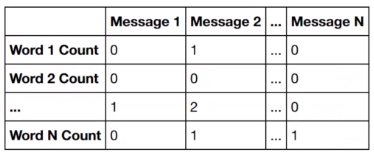

In [36]:
Image(filename='countvectorizer_example.PNG')

Because there are going to be a lot of messages and a lot of words, SciKit Learn is going to put out a sparse matrix, which is a way to handle matrices with a lot of zero values. 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of parameters and arguments that can be passes to the CountVectorizer, but in this case, we are going to use our own defined function. 

In [38]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
# This is printing the total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


So we have 11,425 words in our vocabulary. We can take one sample text message and get its bag of words count as a vector putting to use our new bow_transformer. 

In [40]:
mess4 = messages['message'][3]

In [41]:
print(mess4)

U dun say so early hor... U c already then say...


In [42]:
bow4 = bow_transformer.transform([mess4])

In [43]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [44]:
print(bow4.shape)

(1, 11425)


This means that there are 7 unique words in message 4 (after removing the common stop words). Two of them appear twice, and the rest only once. We can get those words by...

In [45]:
bow_transformer.get_feature_names()[4629]

'already'

Now let's transform the entire bag of words. 

In [47]:
messages_bow = bow_transformer.transform(messages['message'])

In [48]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


So we have a matrix with 5572 rows and 11,425 columns. We can check the amount of non-zero occurences. 

In [49]:
messages_bow.nnz

50548

We have 50,548 non-zero occurences (meaning there are 63,609,552 zeros).

In [53]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {:.3f}%'.format(sparsity))

Sparsity: 0.079%


Now that we have done the counting, we can do the weighting and normalization with TF-IDF. We are going to use scikit learn's TF-IDF tranformer object. 

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [56]:
tfidf4 = tfidf_transformer.transform(bow4)

In [57]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


So we have actually turned a word count into a TF-IDF. You can interpret these numbers are a weight value for each of these words versus the actual document. Now we can go ahead and check the Inverse Document Frequency of a particular word. 

In [59]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

Now let's convert the entire bag of words corpus into a TD-IDF at once. 

In [60]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

We now finally have all the messages represented as numerical vectors and can train our spam/ham classifier. We can use a variety of classifiers, but for a number of reasons, the naive bayes classifier is a good choice. 

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [63]:
spam_detect_model.predict(tfidf4)[0]

'ham'

So our model predicted that the 4th messages would be ham. Let's check that. 

In [65]:
messages['label'][3]

'ham'

To predict for all the messages...

In [66]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [67]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

What is really important to note here is that we trained the model on all of our data. We should be splitting our data into a training set and a test set. 

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

msg_train is just a list of messages. We would still have to grab that data and repeat everything we did - count vectorization, transformation, ID-IDF, fit it, and run MultinomialNB. However, this is such a common process with text data, that scikit learn has a data pipeline filter. So what we can do is run our model again and predict off the test set by using scikit learns pipeline capabilities to store an entire pipeline of our work flow. THis is basically what you do when you work with real world text data. 

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
# Pipeline takes in list of the steps you want to do. 
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
# Now we can directly pass in the message text data and the pipeline will do
# the processing for us

# treat the pipeline model as a normal estimator. 

In [73]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D8F26544C8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [74]:
predictions = pipeline.predict(msg_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1465
        spam       1.00      0.71      0.83       207

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672



So we are predicting with about 97% accuracy just using text data, which is pretty good. There is a lot on NLP - it is basiically an entire subfield of machine learning. 